# Case #8

The phase and bandpass calibrators are included in the product tree of the pipeline results, but they
cannot be found in the online query. We developed a shortcut of putting calibrators in another
database, which could be queried much like the science queries, except there is only continuum
available.
Stacking of calibrator maps has already resulted of interested results (Zwaan, priv.comm.)
The use of this notebook is not scientific, as we have no control over how the flux scale was
determined (usually via a planet or a moon of a planet). With that caveat we are going to plot the
flux as function of time for the calibrators we have available.

(reminder) In another notebook, we should check the flux of the continuum source in NGC3504, as
we have several measurements in different projects.




In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from astroquery.admit import ADMIT
import pandas as pd
a = ADMIT('../admit_cal.db')
a.check()

Found  ../admit_cal.db
Checking db.... 0
71 71 71
Database version: 25-feb-2022. core.py version: 2022-March-03
header    : 1 entries
alma      : 123 entries
win       : 123 entries
lines     : 0 entries
sources   : 123 entries


First we need to find the unique names of the sources. This is probably easiest done with a special
**SELECT DISTINCT** query in sql. We find 18 sources.


In [3]:
p=pd.DataFrame(a.sql('select distinct alma.target_name from alma'))
print(p)

             0
0   J1002+1216
1   J1102+2757
2   J1118+1234
3   J1215+1654
4   J1221+2813
5   J1336-3357
6   J1130+0846
7   J1103+3014
8   J1150+2417
9   J1159+2914
10  J1744-3116
11  J1058+0133
12  J0854+2006
13  J1037-2934
14  J1337-1257
15  J1229+0203
16  J1427-4206
17  J1924-2914


Let's just pick a random one, and review the fluxes, and plot fluxes as function of time (ALMA
keeps the MJD in the database. There are functions to change these back to a human readable
time, but we leave this is as an exercize for the reader!
NOTE: we might need to ask for if flux > 0 or so, to trigger the source column we need for this.




In [4]:
source = "J1058+0133"
t1 = a.query(source_name_alma=source, flux='>0')

select * from alma inner join win on (win.a_id = alma.id)  inner join sources on (sources.w_id = win.id)   WHERE alma.target_name='J1058+0133' AND sources.flux>=0.0 AND sources.l_id = 0  



In [5]:
ci=['t_min', 'flux', 'peak_s']
print(t1[ci])

           t_min  flux  peak_s
0   58067.381452  2.80    2.26
1   58067.381452  2.72    2.15
2   58067.381452  2.70    2.13
3   58067.381452  2.78    2.24
4   58050.537257  2.97    2.97
5   58050.537257  2.88    2.88
6   58050.537257  2.87    2.87
7   58050.537257  2.96    2.96
8   58119.290160  2.95    2.47
9   58119.290160  2.86    2.35
10  58119.290160  2.85    2.33
11  58119.290160  2.93    2.45
12  58055.534294  2.89    2.47
13  58055.534294  2.80    2.36
14  58055.534294  2.79    2.34
15  58055.534294  2.88    2.46
16  58083.495681  2.88    2.50
17  58083.495681  2.79    2.40
18  58083.495681  2.78    2.40
19  58083.495681  2.87    2.49
20  57713.447599  3.70    3.42
21  57713.447599  3.82    3.56
22  57713.447599  3.81    3.55
23  57713.447599  3.72    3.16
24  57830.124871  3.42    3.42
25  57830.124871  3.53    3.52
26  57830.124871  3.52    3.52
27  57830.124871  3.43    3.18
28  57709.478662  3.68    3.36
29  57709.478662  3.68    3.36
30  57709.478662  3.57    3.22
31  5770

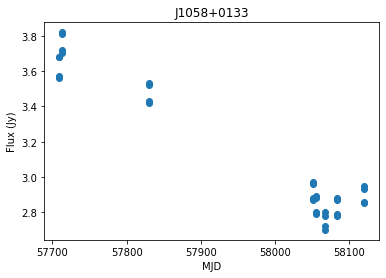

In [6]:
plt.scatter(t1['t_min'],t1['flux']);
plt.title(source)
plt.xlabel('MJD')
plt.ylabel('Flux (Jy)');

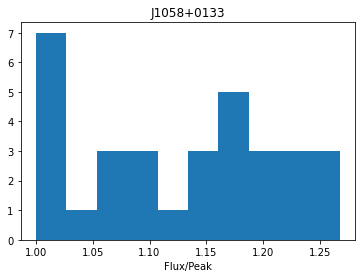

In [7]:
fop = t1['flux']/t1['peak_s']
plt.hist(fop)
plt.xlabel('Flux/Peak')
plt.title(source);

With a quick plotting function we can easily loop over all the sources and be bedazzled?

In [8]:
def qplot(a, source):
    """ plot flux(time) and histogram(flux/peak)"""
    t1 = a.query(source_name_alma=source,flux='>0')
    fop = t1['flux']/t1['peak_s']
    plt.scatter(t1['t_min'],t1['flux']);
    plt.title(source)
    plt.xlabel('MJD')
    plt.ylabel('Flux (Jy)')
    plt.show()
    plt.hist(fop)
    plt.xlabel('Flux/Peak')
    plt.title(source);

In [9]:
for source in p.values:
    print('====',source[0],'====')
    # qplot(a,source[0])


==== J1002+1216 ====
==== J1102+2757 ====
==== J1118+1234 ====
==== J1215+1654 ====
==== J1221+2813 ====
==== J1336-3357 ====
==== J1130+0846 ====
==== J1103+3014 ====
==== J1150+2417 ====
==== J1159+2914 ====
==== J1744-3116 ====
==== J1058+0133 ====
==== J0854+2006 ====
==== J1037-2934 ====
==== J1337-1257 ====
==== J1229+0203 ====
==== J1427-4206 ====
==== J1924-2914 ====
